In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

In [142]:
# Load the data
df = pd.read_csv('framingham.csv')
# Education is a useless data for Heart Attack Risk Prediction
df.drop(['education'],axis=1,inplace=True)
df.head()
df.shape
#Alternate way for cleaning the data
#df.dropna(axis=0, inplace=True)
#df.shape

(4238, 15)

Cleaning the data

In [143]:
#Total percentage of missing data
missing_data = df.isnull().sum()
Total_percentage = (missing_data.sum()/df.shape[0])*100
print('The total percentage of missing data is ',Total_percentage)

The total percentage of missing data is  12.741859367626237


Some EDA to analyse

In [144]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df=clean_dataset(df)
df.head()
df.shape

(3749, 15)

<ipython-input-147-9015fc176813>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax,bins=10)


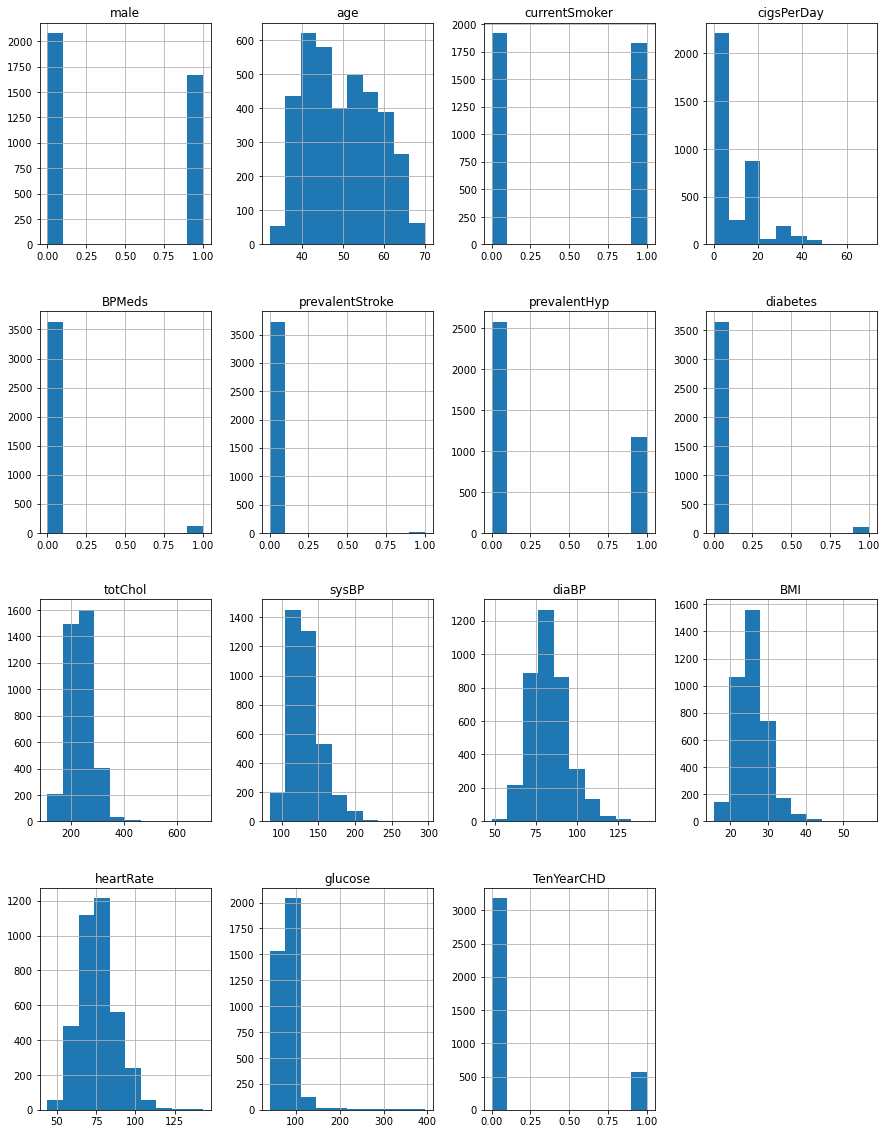

In [147]:
# Histogram
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax=ax,bins=10)
plt.show()

Case counts

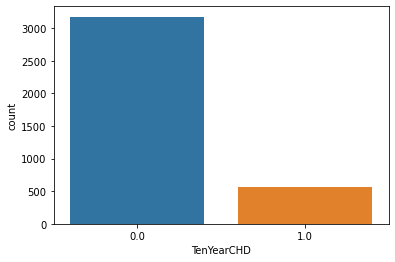

There are 3177 patients without heart disease and 572 patients with the disease


In [149]:
sns.countplot(x='TenYearCHD',data=df)
plt.show()
cases = df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

Number of people who have disease vs age

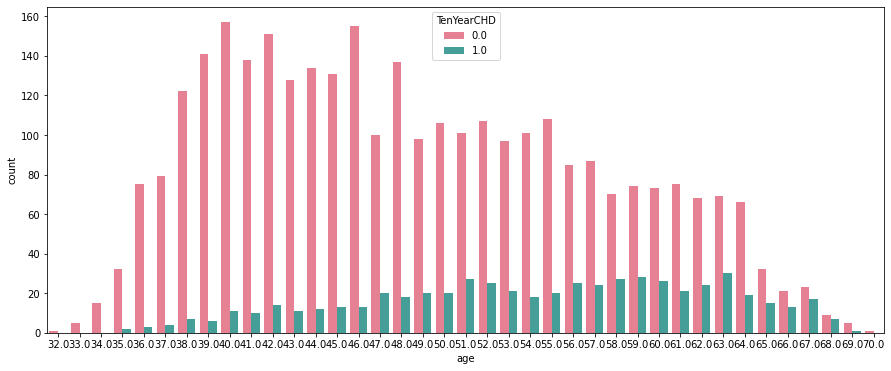

In [151]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'TenYearCHD',palette='husl')
plt.show()

Correlation Heat Map

Using correlation matrix, identify which variables are strongly correlated and in such pairs, choose only one of them.

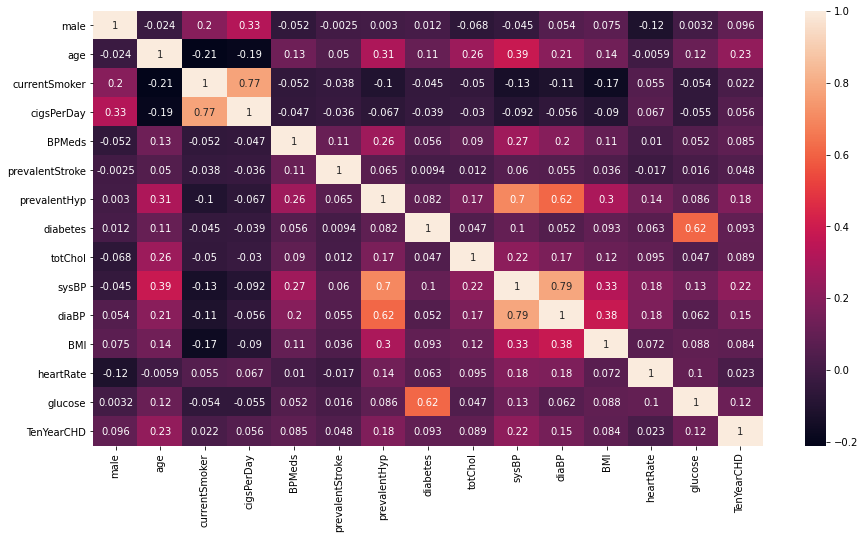

In [152]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

The strongly correlated are cigs per day and current smokers and 
sysBP and daBP

Use One Hot Encoding to convert categorical variables into dummy variables.


In [52]:
# example of a dummy variable encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
# transform data
onehot = encoder.fit_transform(df)
print(onehot)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Normalize the continuous variables.

Pairplot

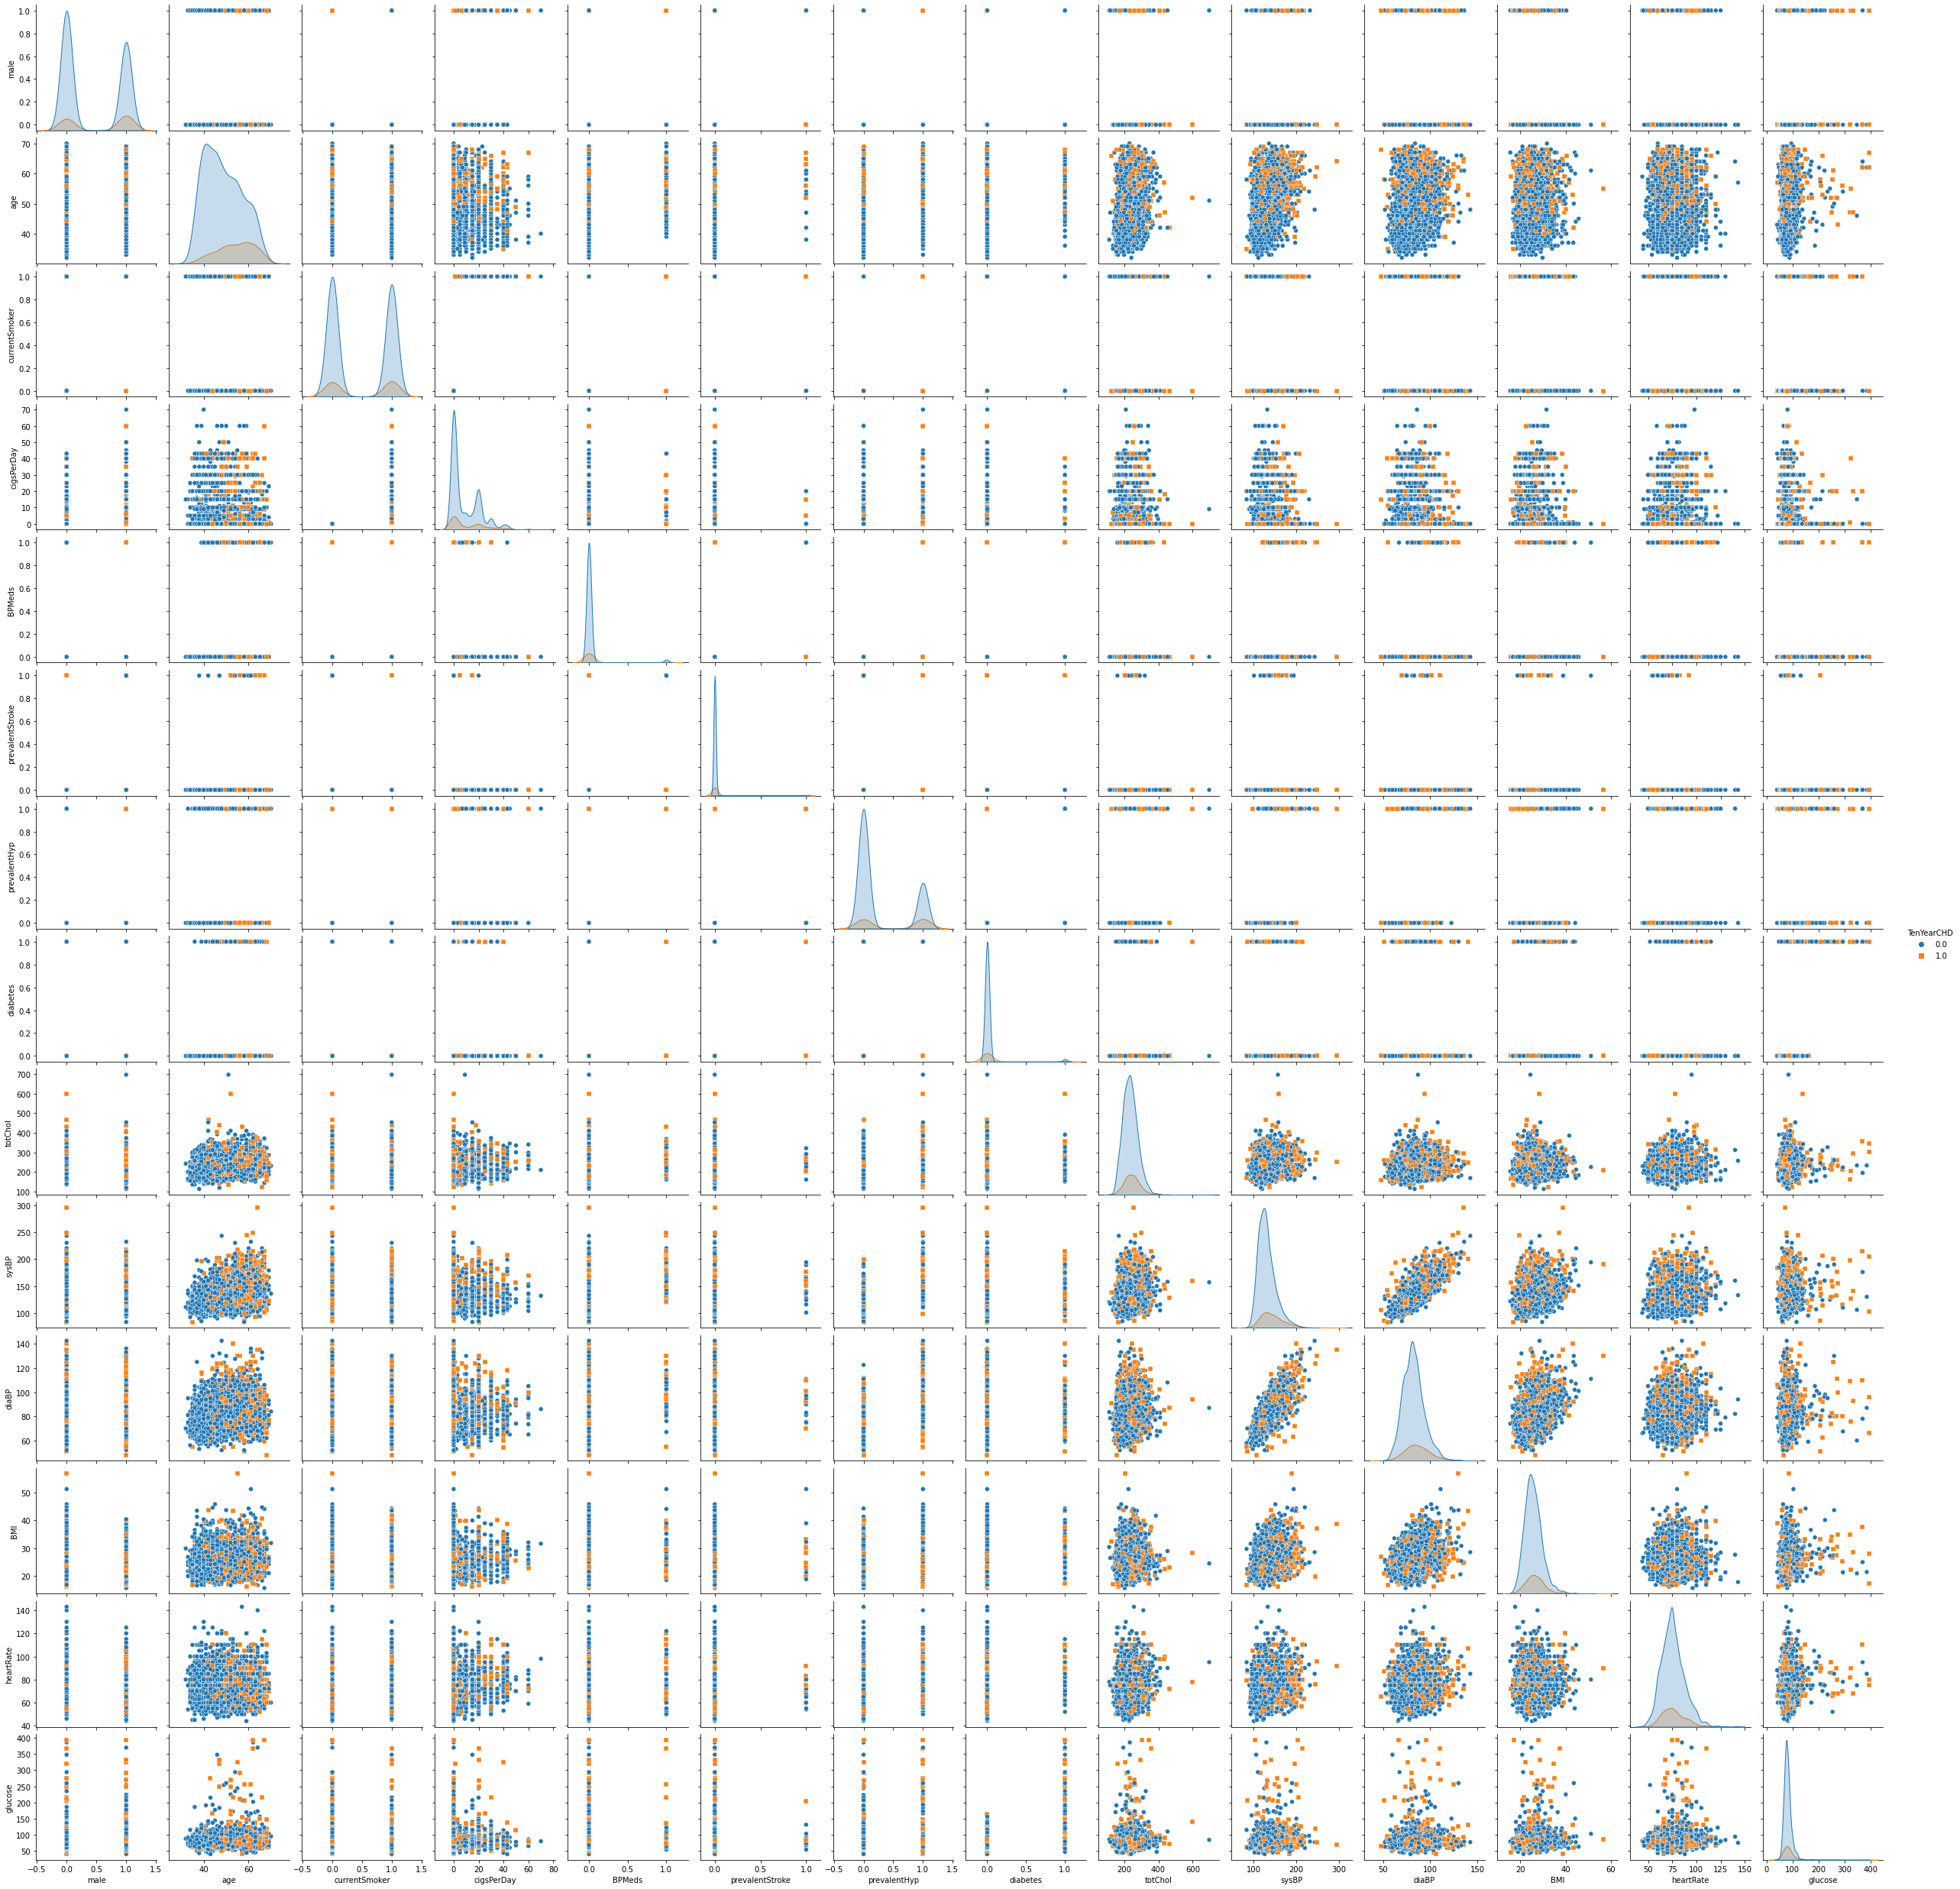

In [156]:
sns.pairplot(df,hue = 'TenYearCHD',markers=["o", "s"])

# Models and Predictions

Split the dataset into train and test dataset using a 80-20 split.

In [157]:
df.drop(['male'],axis=1,inplace=True)
df.drop(['currentSmoker'],axis=1,inplace=True)
df.drop(['cigsPerDay'],axis=1,inplace=True)
df.drop(['BPMeds'],axis=1,inplace=True)
df.drop(['prevalentStroke'],axis=1,inplace=True)
df.drop(['prevalentHyp'],axis=1,inplace=True)
df.drop(['diabetes'],axis=1,inplace=True)

In [159]:
X_new = df.iloc[:,:-1]
y_new = df.iloc[:,-1]

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

In [165]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled) 

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

Models

Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [167]:
# SEARCH FOR OPTIMUN PARAMETERS USING GRIDSEARCH
params = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100],'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [168]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

C:\Users\Samarth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Samarth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Samarth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Samarth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Samarth\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\Samarth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Samarth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Samarth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Samarth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


{'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

In [169]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [170]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 84.0%


<AxesSubplot:>

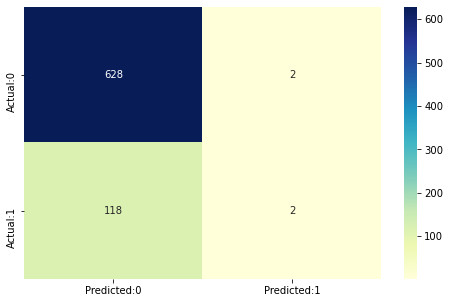

In [171]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [172]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       630
         1.0       0.50      0.02      0.03       120

    accuracy                           0.84       750
   macro avg       0.67      0.51      0.47       750
weighted avg       0.79      0.84      0.77       750



In [173]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 3.23%


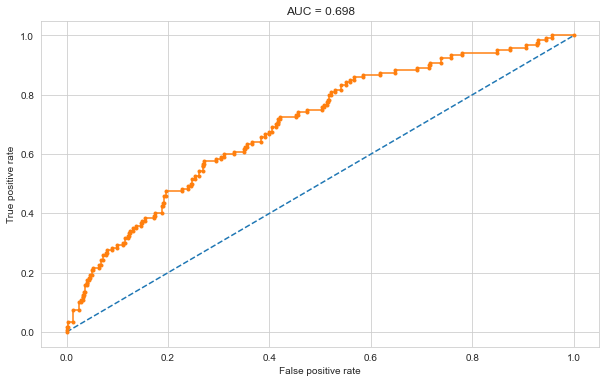

In [174]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

KNN 

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [177]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 6}

In [179]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [180]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")


Using k-nearest neighbours we get an accuracy of 84.27%


<AxesSubplot:>

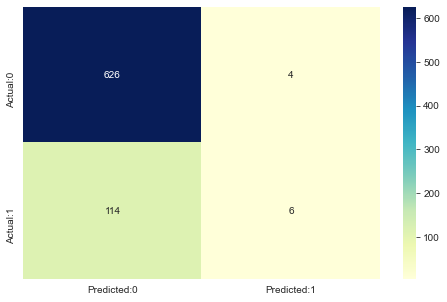

In [181]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [182]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       630
         1.0       0.60      0.05      0.09       120

    accuracy                           0.84       750
   macro avg       0.72      0.52      0.50       750
weighted avg       0.81      0.84      0.78       750



In [183]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 9.23%


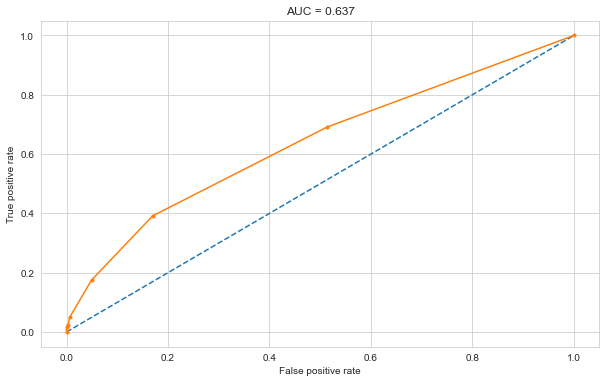

In [184]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

In [185]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [186]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [187]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 11, 'min_samples_split': 2}

In [188]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [189]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 81.47%


<AxesSubplot:>

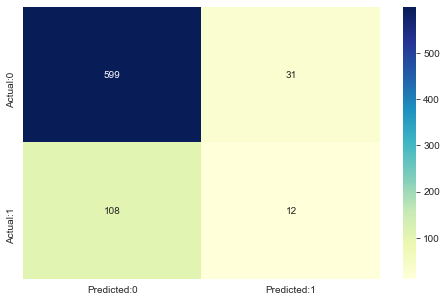

In [190]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [191]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       630
         1.0       0.28      0.10      0.15       120

    accuracy                           0.81       750
   macro avg       0.56      0.53      0.52       750
weighted avg       0.76      0.81      0.78       750



In [192]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 14.72%


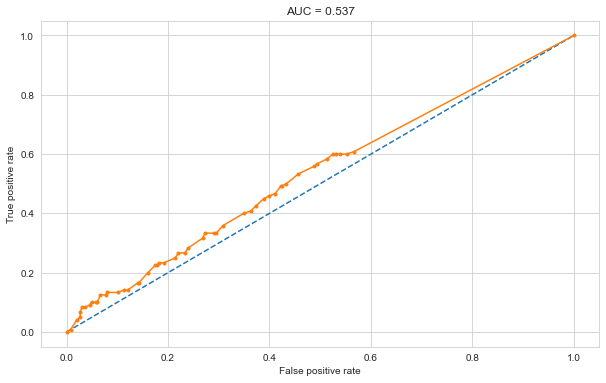

In [193]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

SVM

In [194]:
from sklearn.svm import SVC

In [195]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [ ]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_ 

In [197]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [ ]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

In [ ]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,svm_predict))

In [ ]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

In [ ]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

Model Comparison

In [ ]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [ ]:
comparison

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

The Support vector machine with the radial kernel was the best performing model in terms of accuracy and the F1 score. Its high AUC and this shows that it has a high true positive rate.